# https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/linear-algebra/2-2-linear-maps-between-vector-spaces/examples-and-problems/

2.1.6.4

Original triangle(blue)
 [[0 1]
 [5 1]
 [2 3]
 [0 1]]
Rotation matrix
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
Rotated triangle(orange)
 [[-0.8660254   0.5       ]
 [ 1.6339746   4.83012702]
 [-1.59807621  3.23205081]
 [-0.8660254   0.5       ]]


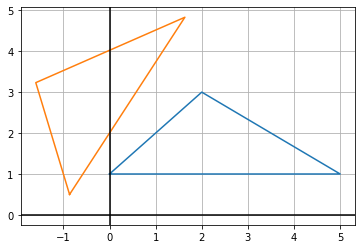

In [1]:
import numpy as np
from numpy.linalg import *
from matplotlib import pyplot as plt
%matplotlib inline
# input needs radians
theta = np.radians(60) 
c, s = np.cos(theta), np.sin(theta)
# rotation matrix
Q = np.array([[c, -s], [s, c]]) 
# array of points
points = np.array([[0, 1],
                   [5, 1],
                   [2, 3], 
                   [0, 1]])
# array of rotated points

points2 = np.array([np.matmul(Q,i) for i in points])

print("Original triangle(blue)\n",points)
print("Rotation matrix\n",Q)
print("Rotated triangle(orange)\n",points2)
fig, ax = plt.subplots()
ax.plot(points[:,0], points[:,1])
ax.plot(points2[:,0], points2[:,1])
ax.grid(True, which='both')
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')

2.1.6.5

<IPython.core.display.Javascript object>


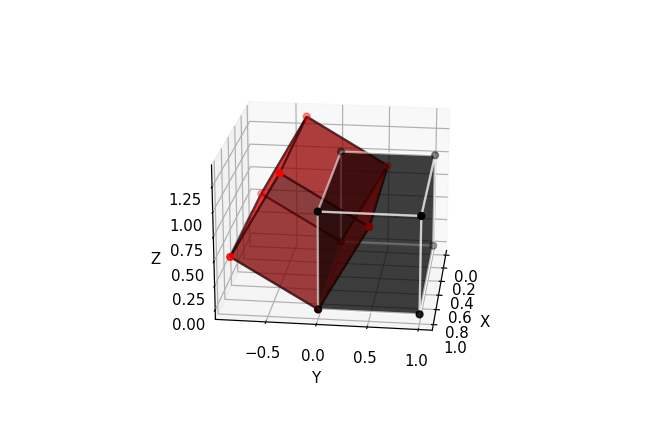

Cube points(blue)
 [[0 0 0]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 1]
 [1 1 1]
 [0 1 1]]
Rotation matrix on x axis
 [[ 1.         0.         0.       ]
 [ 0.         0.5       -0.8660254]
 [ 0.         0.8660254  0.5      ]]
Rotated cube points(red)
 [[ 0.         0.         0.       ]
 [ 1.         0.         0.       ]
 [ 1.         0.5        0.8660254]
 [ 0.         0.5        0.8660254]
 [ 0.        -0.8660254  0.5      ]
 [ 1.        -0.8660254  0.5      ]
 [ 1.        -0.3660254  1.3660254]
 [ 0.        -0.3660254  1.3660254]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
theta = np.radians(60) 
c, s = np.cos(theta), np.sin(theta)
# rotation on x axis
Q = np.array([[1, 0, 0], 
              [0, c, -s], 
              [0, s, c]])
# points for cube
points = np.array([[0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 0],
                   [0, 1, 0],
                   [0, 0, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 1, 1]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot surfaces and edges of the cube
r = [0,1]
# X = [[0,1],[0,1]]
# Y = [[0 0],[1 1]]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)
# display surface
ax.plot_surface(X,Y,one, alpha = 0.5, color = "black")
ax.plot_surface(X,Y,zero, alpha = 0.5, color = "black")
ax.plot_surface(X,zero,Y, alpha = 0.5, color = "black")
ax.plot_surface(X,one,Y, alpha = 0.5, color = "black")
ax.plot_surface(one,X,Y, alpha = 0.5, color = "black")
ax.plot_surface(zero,X,Y, alpha = 0.5, color = "black")
# display outline
ax.plot_wireframe(X,Y,one, alpha = 0.5, color = "white")
ax.plot_wireframe(X,Y,zero, alpha = 0.5, color = "white")
ax.plot_wireframe(X,zero,Y, alpha = 0.5, color = "white")
ax.plot_wireframe(X,one,Y, alpha = 0.5, color = "white")
ax.plot_wireframe(one,X,Y, alpha = 0.5, color = "white")
ax.plot_wireframe(zero,X,Y, alpha = 0.5, color = "white")
# plot points of cube
ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], color = "black")
# rotation of cube on x axis
points2 = np.matmul(Q,points[0])
def rotFrame(X,Y,Z):
    temp = np.array([[X[i][j], Y[i][j], Z[i][j]] for i in range(X.shape[0]) for j in range(X.shape[1])])
    out = np.array([np.matmul(Q,i) for i in temp])
    # edit shape into 2 x 2
    _X = np.array([out[:,0]]).reshape(2,2)
    _Y = np.array([out[:,1]]).reshape(2,2)
    _Z = np.array([out[:,2]]).reshape(2,2)
    ax.plot_wireframe(_X,_Y,_Z, alpha=0.5,color="black")
    ax.plot_surface(_X,_Y,_Z, alpha=0.5,color = "red")
rotFrame(X,Y,one)
rotFrame(X,Y,zero)
rotFrame(X,zero,Y)
rotFrame(X,one,Y)
rotFrame(one,X,Y)
rotFrame(zero,X,Y)
# rotate points
points2 = np.array([np.matmul(Q,i) for i in points])
# plot points
ax.scatter3D(points2[:, 0], points2[:, 1], points2[:, 2],color = "red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
print("Cube points(blue)\n", points)
print("Rotation matrix on x axis\n",Q)
print("Rotated cube points(red)\n", points2)

2.2.6

<IPython.core.display.Javascript object>


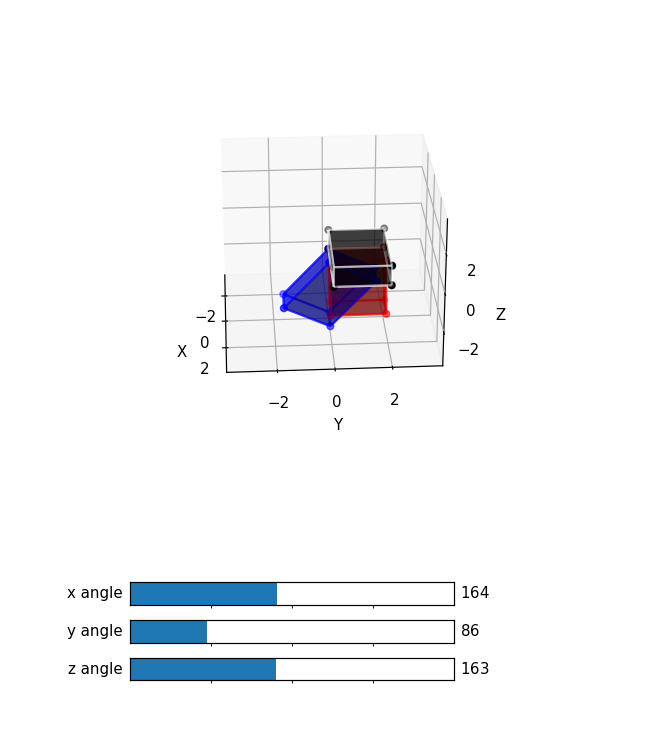

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
class plot3dCube(object):
    def __init__(self, origin, length, color):
        # origin[x,y,z], length[Lx,Ly,Lz], 
        # color[original[surface & point, edge], Qxyz[surface & point, edge], Qzxy[surface & point, edge]
        Lx,Ly,Lz = length
        x1,y1,z1 = origin
        origin1 = x2,y2,z2 = [length[i]+origin[i] for i in range(3)]
        # for A as X,Y,Z
        # A_1212 uses [[x1, x2][x1,x2]]
        # A_1122 is just X_1.T
        # A_1111 all x1
        # A_2222 all x2
        r = [x1, x2]
        X_1212 = np.array([r,r])
        X_1111 = np.ones(4).reshape(2, 2)*x1
        X_2222 = np.ones(4).reshape(2, 2)*x2
        r = [y1, y2]
        Y_1212, Y_1122 = np.meshgrid(r, r)
        Y_1111 = np.ones(4).reshape(2, 2)*y1
        Y_2222 = np.ones(4).reshape(2, 2)*y2
        r = [z1, z2]
        Z_1122 = np.array([r,r]).transpose()
        Z_1111 = np.ones(4).reshape(2, 2)*z1
        Z_2222 = np.ones(4).reshape(2, 2)*z2
        # points of the cube
        self.points = np.array([[x1, y1, z1],
                               [x2, y1, z1],
                               [x2, y2, z1],
                               [x1, y2, z1],
                               [x1, y1, z2],
                               [x2, y1, z2],
                               [x2, y2, z2],
                               [x1, y2, z2]])

        # square points for surface, edges
        self.sqrP = [[X_1212,Y_1122,Z_1111],[X_1212,Y_1122,Z_2222],
                     [X_1212,Y_1111,Z_1122],[X_1212,Y_2222,Z_1122],
                     [X_1111,Y_1212,Z_1122],[X_2222,Y_1212,Z_1122]]
        # create plot figure
        self.fig = plt.figure(figsize=(6,7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        # range of axis
        axis = origin+origin1
        # get abolsute for each axis length
        axis =  [abs(i) for i in axis] 
        # get two highes axis lengths
        for i in range(len(axis)-2):
            axis.remove(min(axis))
        # pythagorean theorem
        l = np.sqrt(sum([i**2 for i in axis]))
        self.ax.set_xlim3d(-l, l)
        self.ax.set_ylim3d(-l, l)
        self.ax.set_zlim3d(-l, l)
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        # surface frame and edge variable names
        self.s = ["self.surfacex","self.surfacez"]
        self.e = ["self.edgex","self.edgez"]
        # set color 
        self.ogColor, self.QxQyQzColor, self.QzQyQxColor = color
        # Construct plot, surfaces and edges
        # plot initial points
        # black is original, does not move
        self.sc = self.ax.scatter3D(self.points[:,0],self.points[:,1], self.points[:,2],color = self.ogColor[0])
        # blue is Q = Qx*Qy*Qz
        self.scx = self.ax.scatter3D(self.points[:,0],self.points[:,1], self.points[:,2], color = self.QxQyQzColor[0] )
        # red is Q = Qz*Qy*Qx
        self.scz = self.ax.scatter3D(self.points[:,0],self.points[:,1], self.points[:,2],color = self.QzQyQxColor[0])
        # plot surface and edges
        # Original cube(does not move)
        self.color = self.ogColor
        # dictionary of surfaces and edges
        self.dFrm = {}
        # surface variable name
        surface = "self.surface"
        # edge variable name
        edge = "self.edge"
        # original plot
        for i in range(len(self.sqrP)):
            # number
            n = str(i)
            self.dFrm[surface+n], self.dFrm[edge+n] = self.initFrame(self.sqrP[i][:])
        for i in range(len(self.s)):
            # QxQyQz plot
            if(i == 0):
                self.color = self.QxQyQzColor
            # QzQyQx plot
            else:
                self.color = self.QzQyQxColor
            surface = self.s[i]
            edge = self.e[i]
            # generate each surface and edge
            for j in range(len(self.sqrP)):
                n = str(j)
                self.dFrm[surface+n], self.dFrm[edge+n] = self.initFrame(self.sqrP[j][:])
        # slider plot
        # adjust plot
        plt.subplots_adjust(left = 0.1, bottom = 0.45)
        # input the position of sliders
        xSlider = plt.axes([0.2,0.2,0.5,0.03])
        ySlider = plt.axes([0.2,0.15,0.5,0.03])
        zSlider = plt.axes([0.2,0.1,0.5,0.03])
        xSlider.set_xticks(np.array([90,180,270]), minor = True)
        ySlider.set_xticks(np.array([90,180,270]), minor = True)
        zSlider.set_xticks(np.array([90,180,270]), minor = True)
        # input values and update graph
        self.slider1 = Slider(xSlider, 'x angle', 0, 360, valinit = 0, valstep = 1)
        self.slider2 = Slider(ySlider, 'y angle', 0, 360, valinit = 0, valstep = 1)
        self.slider3 = Slider(zSlider, 'z angle', 0, 360, valinit = 0, valstep = 1)
        # updates the graph when input is changes
        self.slider1.on_changed(self.updateGraph)
        self.slider2.on_changed(self.updateGraph)
        self.slider3.on_changed(self.updateGraph)
    # determins the rotation matricies from inputed angles
    def setMatrix(self, x, y, z):
        xtheta = np.radians(x) 
        ytheta = np.radians(y) 
        ztheta = np.radians(z)
        # cos sin values
        cx, sx = np.cos(xtheta), np.sin(xtheta)
        cy, sy = np.cos(ytheta), np.sin(ytheta)
        cz, sz = np.cos(ztheta), np.sin(ztheta)
        # x rotation matrix
        self.Qx = np.array([[1, 0, 0], 
                            [0, cx, -sx], 
                            [0, sx, cx]])
        # y rotation matrix
        self.Qy = np.array([[cy, 0, sy], 
                            [0, 1, 0], 
                            [-sy, 0, cy]])
        # z rotation matrix
        self.Qz = np.array([[cz, -sz, 0], 
                            [sz, cz, 0], 
                            [0, 0, 1]])
        # QxQyQz Matrix
        self.QxQyQz = self.Qx@self.Qy@self.Qz
        # QzQyQx Matrix
        self.QzQyQx = self.Qz@self.Qy@self.Qx
    # When you first draw the frame and edges
    def initFrame(self, sqrP):
        surface = self.ax.plot_surface(sqrP[0],sqrP[1],sqrP[2],alpha=0.5,color=self.color[0])
        edge = self.ax.plot_wireframe(sqrP[0],sqrP[1],sqrP[2],alpha=0.5,color=self.color[1])
        return surface, edge
    # rotate matrix * original to get new surface and edges
    def rotFrame(self, surface, edge, X, Y, Z):
        #destory previous surfaces and edges
        surface.remove()
        edge.remove()
        # X, Y, Z are a 2x2 matrix
        # first convert the 3 2x2 matricies into a 1 x 3 vector
        temp = np.array([[X[i][j], Y[i][j], Z[i][j]] for i in range(X.shape[0]) for j in range(X.shape[1])])
        # QxQyQz plot
        if(self.color == self.QxQyQzColor):
            out = np.array([np.matmul(self.QxQyQz,i) for i in temp])
        # QzQyQx plot
        elif(self.color == self.QzQyQxColor):
            out = np.array([np.matmul(self.QzQyQx,i) for i in temp])
        # edit shape into 2 x 2
        _X = np.array([out[:,0]]).reshape(2,2)
        _Y = np.array([out[:,1]]).reshape(2,2)
        _Z = np.array([out[:,2]]).reshape(2,2)
        # plot surfaces and edges
        surface = self.ax.plot_surface(_X,_Y,_Z, alpha = 0.5, color = self.color[0])
        edge = self.ax.plot_wireframe(_X,_Y,_Z, alpha = 0.5, color = self.color[1])
        return surface, edge
    # creates the rotated frame, then deletes the old one and adds the new one
    def rotFrames(self):        
        for i in range(len(self.s)):
            # QxQyQz cube
            if(i == 0):
                self.color = self.QxQyQzColor
            # QzQyQx cube
            else:
                self.color = self.QzQyQxColor
            surface = self.s[i]
            edge = self.e[i]
            # destroy current surface and edge, new surface and edge
            for j in range(6):
                n = str(j)
                self.dFrm[surface+n], self.dFrm[edge+n]= self.rotFrame(self.dFrm[surface+n],self.dFrm[edge+n], 
                                                                 self.sqrP[j][0],self.sqrP[j][1],self.sqrP[j][2])
        plt.draw()
        plt.pause(.01)
    # rotates the points of the scatter plot
    def rotPoints(self):
        # QxQyQz points
        self.points2 = np.array([np.matmul(self.QxQyQz,i) for i in self.points])
        # QzQyQx points
        self.points3 = np.array([np.matmul(self.QzQyQx,i) for i in self.points])
        # plot points
        # QxQyQz plot
        self.scx._offsets3d = (self.points2[:, 0], self.points2[:, 1], self.points2[:, 2])
        # QzQyQx plot
        self.scz._offsets3d = (self.points3[:, 0], self.points3[:, 1], self.points3[:, 2])
    def updateGraph(self, event):
        # change matrix
        self.setMatrix(self.slider1.val,self.slider2.val,self.slider3.val)
        # print points
        self.rotPoints()
        # print surfaces and edges
        self.rotFrames()
# main function
# NOTE: spamming the inputs will freeze the plot
p = plot3dCube([0,0,0], [3,2,1],[["black","white"],["blue","blue"],["red","red"]])
#genInput()

2.1.6.7

Original triangle(black)
 [[0 1]
 [5 1]
 [2 3]
 [0 1]]
Reflected triange on y axis(blue)
 [[ 0  1]
 [-5  1]
 [-2  3]
 [ 0  1]]
Reflected triange for x = y(red)
 [[-1  0]
 [-1 -5]
 [-3 -2]
 [-1  0]]


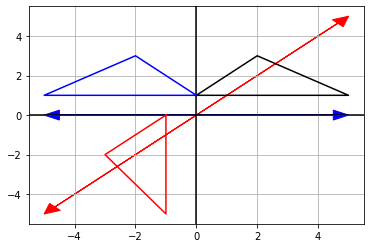

In [5]:
import numpy as np
from numpy.linalg import *
from matplotlib import pyplot as plt
%matplotlib inline
# array of points
points = np.array([[0, 1],
                   [5, 1],
                   [2, 3],
                   [0, 1]]) 
print("Original triangle(black)\n",points)
fig, ax = plt.subplots()
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
# relect points using the matrix
def refPlot(Q, color, out):
    points2 = np.array([np.matmul(Q,i) for i in points])
    ax.plot(points2[:,0], points2[:,1], color = color)
    print("Reflected triange", out, points2)
# plot original points
ax.plot(points[:,0], points[:,1], color = "black")
# arrow lines
ax.arrow(-5,0,10,0, color = "blue",length_includes_head = True,head_width=.5, head_length=.5)
ax.arrow(-5,-5,10,10, color = "red",length_includes_head = True,head_width=.5, head_length=.5)
ax.arrow(5,0,-10,0, color = "blue",length_includes_head = True,head_width=.5, head_length=.5)
ax.arrow(5,5,-10,-10, color = "red",length_includes_head = True,head_width=.5, head_length=.5)
# plot reflected points
# matrix for reflecting on the y axis
refPlot(np.array([[-1,0],[0,1]]), "blue","on y axis(blue)\n")
# matrix for x = y
refPlot(np.array([[0,-1],[-1,0]]),"red","for x = y(red)\n")  
